In [118]:
from torch import nn
from tqdm import *

In [119]:
class DRNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(DRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # (batch, sequence, feature)
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        # self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='relu')
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        state = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        output, _ = self.rnn(x, state)
        output = self.linear(output)
        return output

In [120]:
model = DRNN(input_size=16, output_size=16, hidden_size=64, num_layers=2)
for name, parameters in model.named_parameters():
    print(name, ": ", parameters.size())

rnn.weight_ih_l0 :  torch.Size([64, 16])
rnn.weight_hh_l0 :  torch.Size([64, 64])
rnn.bias_ih_l0 :  torch.Size([64])
rnn.bias_hh_l0 :  torch.Size([64])
rnn.weight_ih_l1 :  torch.Size([64, 64])
rnn.weight_hh_l1 :  torch.Size([64, 64])
rnn.bias_ih_l1 :  torch.Size([64])
rnn.bias_hh_l1 :  torch.Size([64])
linear.weight :  torch.Size([16, 64])
linear.bias :  torch.Size([16])


In [121]:
class BRNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(BRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.linear = nn.Linear(hidden_size * 2, output_size)

    def forward(self, x):
        state = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size)
        output, _ = self.rnn(x, state)
        output = self.linear(output)
        return output

In [122]:
model = BRNN(input_size=16, output_size=16, hidden_size=64, num_layers=2)
for name, parameters in model.named_parameters():
    print(name, ": ", parameters.size())

rnn.weight_ih_l0 :  torch.Size([64, 16])
rnn.weight_hh_l0 :  torch.Size([64, 64])
rnn.bias_ih_l0 :  torch.Size([64])
rnn.bias_hh_l0 :  torch.Size([64])
rnn.weight_ih_l0_reverse :  torch.Size([64, 16])
rnn.weight_hh_l0_reverse :  torch.Size([64, 64])
rnn.bias_ih_l0_reverse :  torch.Size([64])
rnn.bias_hh_l0_reverse :  torch.Size([64])
rnn.weight_ih_l1 :  torch.Size([64, 128])
rnn.weight_hh_l1 :  torch.Size([64, 64])
rnn.bias_ih_l1 :  torch.Size([64])
rnn.bias_hh_l1 :  torch.Size([64])
rnn.weight_ih_l1_reverse :  torch.Size([64, 128])
rnn.weight_hh_l1_reverse :  torch.Size([64, 64])
rnn.bias_ih_l1_reverse :  torch.Size([64])
rnn.bias_hh_l1_reverse :  torch.Size([64])
linear.weight :  torch.Size([16, 128])
linear.bias :  torch.Size([16])


In [123]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        output, _ = self.lstm(x)
        output = self.linear(output)
        return output

In [124]:
model = LSTM(input_size=16, output_size=16, hidden_size=64, num_layers=2)
for name, parameters in model.named_parameters():
    print(name, ": ", parameters.size())

lstm.weight_ih_l0 :  torch.Size([256, 16])
lstm.weight_hh_l0 :  torch.Size([256, 64])
lstm.bias_ih_l0 :  torch.Size([256])
lstm.bias_hh_l0 :  torch.Size([256])
lstm.weight_ih_l1 :  torch.Size([256, 64])
lstm.weight_hh_l1 :  torch.Size([256, 64])
lstm.bias_ih_l1 :  torch.Size([256])
lstm.bias_hh_l1 :  torch.Size([256])
linear.weight :  torch.Size([16, 64])
linear.bias :  torch.Size([16])


In [125]:
class GRU(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        output, _ = self.gru(x)
        output = self.linear(output)
        return output

In [126]:
model = GRU(input_size=16, output_size=16, hidden_size=64, num_layers=2)
for name, parameters in model.named_parameters():
    print(name, ": ", parameters.size())

gru.weight_ih_l0 :  torch.Size([192, 16])
gru.weight_hh_l0 :  torch.Size([192, 64])
gru.bias_ih_l0 :  torch.Size([192])
gru.bias_hh_l0 :  torch.Size([192])
gru.weight_ih_l1 :  torch.Size([192, 64])
gru.weight_hh_l1 :  torch.Size([192, 64])
gru.bias_ih_l1 :  torch.Size([192])
gru.bias_hh_l1 :  torch.Size([192])
linear.weight :  torch.Size([16, 64])
linear.bias :  torch.Size([16])


In [127]:
import pandas_datareader as pdr

dji = pdr.DataReader('^DJI', 'stooq')
dji

,Open,High,Low,Close,Volume
Date,,,,,
2025-09-03,45309.43,45309.43,44980.36,45271.23,350358547.0
2025-09-02,45287.73,45295.81,44948.16,45295.81,335363051.0
2025-08-29,45590.96,45616.16,45377.21,45544.88,300295821.0
2025-08-28,45581.03,45682.83,45442.68,45636.90,299860047.0
2025-08-27,45417.46,45621.08,45372.78,45565.23,752109228.0
...,...,...,...,...,...
2020-09-11,27613.86,27828.82,27448.15,27665.64,488365888.0
2020-09-10,28022.51,28174.78,27447.08,27534.58,502207664.0
2020-09-09,27711.71,28206.21,27704.54,27940.47,513595988.0


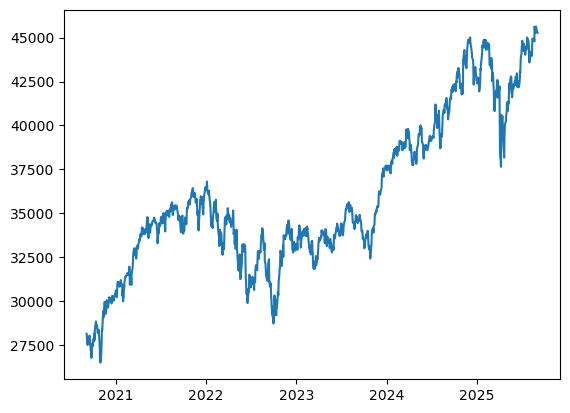

In [128]:
import matplotlib.pyplot as plt

plt.plot(dji['Close'])
plt.show()

In [129]:
import torch
from torch.utils.data import DataLoader, TensorDataset

num = len(dji)
x = torch.tensor(dji['Close'].to_list())
# Normalize Input Data
x = (x - x.mean()) / x.std()
seq_len = 16
batch_size = 16

X_feature = torch.zeros((num - seq_len, seq_len))
Y_label = torch.zeros((num - seq_len, seq_len))

for i in range(seq_len):
    X_feature[:, i] = x[i: num - seq_len + i]
    Y_label[:, i] = x[i + 1: num - seq_len + i + 1]

train_loader = DataLoader(TensorDataset(X_feature[: num - seq_len].unsqueeze(2), Y_label[: num - seq_len]),
                          batch_size=batch_size, shuffle=True)

In [130]:
input_size = 1
output_size = 1
num_hiddens = 64
num_layers = 2
lr = 0.001

model = DRNN(input_size, output_size, num_hiddens, num_layers)
loss_fn = nn.MSELoss(reduction='none')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [131]:
num_epochs = 20
rnn_loss_history = []

for epoch in tqdm(range(num_epochs)):
    for X, Y in train_loader:
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred.squeeze(), Y.squeeze())
        loss.sum().backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        total_loss = 0
        for X, Y in train_loader:
            y_pred = model(X)
            loss = loss_fn(y_pred.squeeze(), Y.squeeze())
            total_loss += loss.sum() / loss.numel()
        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}: Validation Loss: {avg_loss:.4f}")
        rnn_loss_history.append(avg_loss)

  5%|▌         | 1/20 [00:00<00:05,  3.53it/s]

Epoch 1: Validation Loss: 0.0216


 10%|█         | 2/20 [00:00<00:04,  3.64it/s]

Epoch 2: Validation Loss: 0.0082


 15%|█▌        | 3/20 [00:00<00:04,  3.63it/s]

Epoch 3: Validation Loss: 0.0067


 20%|██        | 4/20 [00:01<00:04,  3.64it/s]

Epoch 4: Validation Loss: 0.0065


 25%|██▌       | 5/20 [00:01<00:04,  3.62it/s]

Epoch 5: Validation Loss: 0.0061


 30%|███       | 6/20 [00:01<00:03,  3.68it/s]

Epoch 6: Validation Loss: 0.0061


 35%|███▌      | 7/20 [00:01<00:03,  3.68it/s]

Epoch 7: Validation Loss: 0.0059


 40%|████      | 8/20 [00:02<00:03,  3.70it/s]

Epoch 8: Validation Loss: 0.0061


 45%|████▌     | 9/20 [00:02<00:02,  3.71it/s]

Epoch 9: Validation Loss: 0.0061


 50%|█████     | 10/20 [00:02<00:02,  3.72it/s]

Epoch 10: Validation Loss: 0.0067


 55%|█████▌    | 11/20 [00:02<00:02,  3.66it/s]

Epoch 11: Validation Loss: 0.0060


 60%|██████    | 12/20 [00:03<00:02,  3.64it/s]

Epoch 12: Validation Loss: 0.0062


 65%|██████▌   | 13/20 [00:03<00:01,  3.68it/s]

Epoch 13: Validation Loss: 0.0063


 70%|███████   | 14/20 [00:03<00:01,  3.72it/s]

Epoch 14: Validation Loss: 0.0060


 75%|███████▌  | 15/20 [00:04<00:01,  3.69it/s]

Epoch 15: Validation Loss: 0.0064


 80%|████████  | 16/20 [00:04<00:01,  3.73it/s]

Epoch 16: Validation Loss: 0.0060


 85%|████████▌ | 17/20 [00:04<00:00,  3.68it/s]

Epoch 17: Validation Loss: 0.0066


 90%|█████████ | 18/20 [00:04<00:00,  3.66it/s]

Epoch 18: Validation Loss: 0.0058


 95%|█████████▌| 19/20 [00:05<00:00,  3.67it/s]

Epoch 19: Validation Loss: 0.0058


100%|██████████| 20/20 [00:05<00:00,  3.68it/s]

Epoch 20: Validation Loss: 0.0064


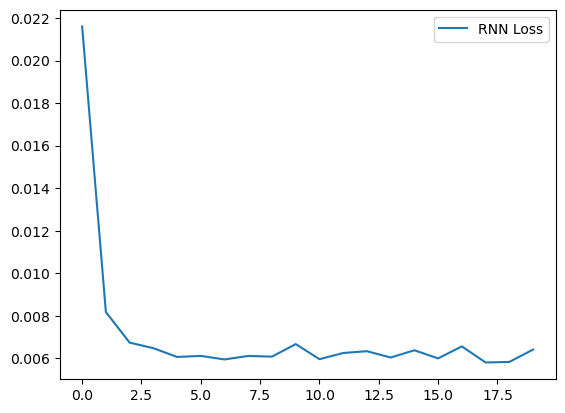

In [132]:
import matplotlib.pyplot as plt

plt.plot(rnn_loss_history, label="RNN Loss")
plt.legend()
plt.show()

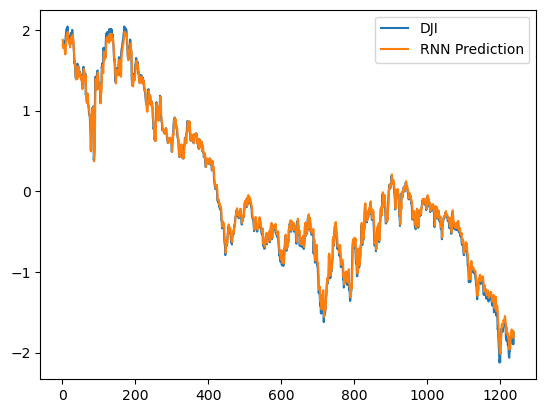

In [133]:
rnn_preds = model(X_feature.unsqueeze(dim=2))
rnn_preds.squeeze()
time = torch.arange(1, num + 1, dtype=torch.float32)

plt.plot(time[: num - seq_len], x[seq_len: num], label="DJI")
plt.plot(time[: num - seq_len], rnn_preds[:, seq_len - 1].detach(), label="RNN Prediction")
plt.legend()
plt.show()

In [134]:
input_size = 1
output_size = 1
num_hiddens = 64
num_layers = 2
lr = 0.001

model_name = ['DRNN', 'BRNN', 'LSTM', 'GRU']
drnn = DRNN(input_size, output_size, num_hiddens, num_layers)
brnn = BRNN(input_size, output_size, num_hiddens, num_layers)
lstm = LSTM(input_size, output_size, num_hiddens, num_layers)
gru = GRU(input_size, output_size, num_hiddens, num_layers)
models = [drnn, brnn, lstm, gru]

optimizers = [torch.optim.Adam(drnn.parameters(), lr=lr),
              torch.optim.Adam(brnn.parameters(), lr=lr),
              torch.optim.Adam(lstm.parameters(), lr=lr),
              torch.optim.Adam(gru.parameters(), lr=lr)]
loss_fn = nn.MSELoss(reduction='none')

num_epochs = 20
rnn_loss_history = []
lr = 0.1

for epoch in tqdm(range(num_epochs)):
    for X, Y in train_loader:
        for index, (model, optimizer) in enumerate(zip(models, optimizers)):
            y_pred = model(X)
            loss = loss_fn(y_pred.squeeze(), Y.squeeze())
            optimizer.zero_grad()
            loss.sum().backward()
            optimizer.step()

100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


In [135]:
for i in range(len(models)):
    rnn_preds = models[i](X_feature.unsqueeze(dim=2))
    bias = torch.sum(x[seq_len:num] - rnn_preds[:, seq_len-1].detach().numpy())
    print(f"Model {model_name[i]} bias: {bias:.4f}")


Model DRNN bias: 28090.3750
Model BRNN bias: 11847.8750
Model LSTM bias: 299.6094
Model GRU bias: 1362.4531


C:\Users\yuanz\AppData\Local\Temp\ipykernel_21968\1003854137.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  bias = torch.sum(x[seq_len:num] - rnn_preds[:, seq_len-1].detach().numpy())
